K-

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [40]:
df = pd.read_csv('Classified Data', index_col=0)

In [41]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


<Axes: >

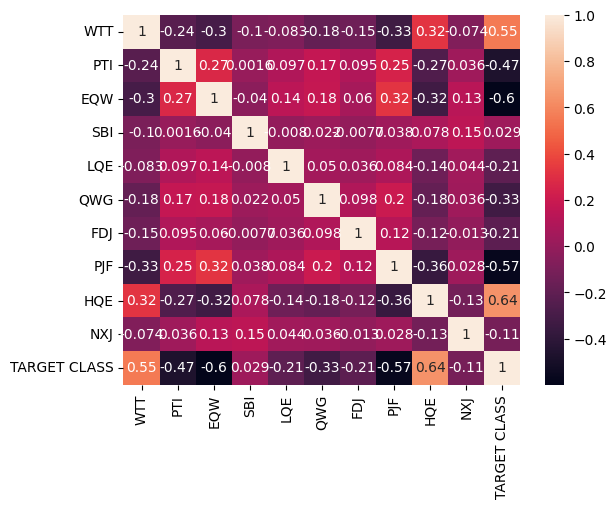

In [42]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [44]:
scaler.fit(df.drop('TARGET CLASS', axis=1))

,copy,True
,with_mean,True
,with_std,True


In [45]:
scaler_features = scaler.transform(df.drop('TARGET CLASS', axis=1))

In [46]:
df_feat = pd.DataFrame(scaler_features, columns=df.columns[:-1])
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [47]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_feat, df['TARGET CLASS'], test_size=0.3)

In [48]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=28)
knn.fit(x_train, y_train)

,n_neighbors,28
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [49]:
pred=knn.predict(x_test)

In [50]:
pred[:5]

array([0, 0, 1, 1, 1])

In [51]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, pred))

[[139  12]
 [  6 143]]


In [52]:
print(accuracy_score(y_test, pred))

0.94


In [53]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       151
           1       0.92      0.96      0.94       149

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



K value

In [54]:
import sys
import numpy as np
np.set_printoptions(threshold=sys.maxsize)
pd.set_option('display.max_rows', None)

In [55]:
error_rate = []
for i in range(1, 60):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))
print(error_rate)

[np.float64(0.08666666666666667), np.float64(0.09), np.float64(0.08333333333333333), np.float64(0.07), np.float64(0.07), np.float64(0.06666666666666667), np.float64(0.06), np.float64(0.056666666666666664), np.float64(0.056666666666666664), np.float64(0.06), np.float64(0.06333333333333334), np.float64(0.06), np.float64(0.06), np.float64(0.056666666666666664), np.float64(0.06333333333333334), np.float64(0.056666666666666664), np.float64(0.056666666666666664), np.float64(0.05333333333333334), np.float64(0.05333333333333334), np.float64(0.05), np.float64(0.05333333333333334), np.float64(0.056666666666666664), np.float64(0.056666666666666664), np.float64(0.06), np.float64(0.05333333333333334), np.float64(0.06), np.float64(0.06), np.float64(0.06), np.float64(0.06), np.float64(0.056666666666666664), np.float64(0.056666666666666664), np.float64(0.056666666666666664), np.float64(0.056666666666666664), np.float64(0.056666666666666664), np.float64(0.06333333333333334), np.float64(0.06333333333333

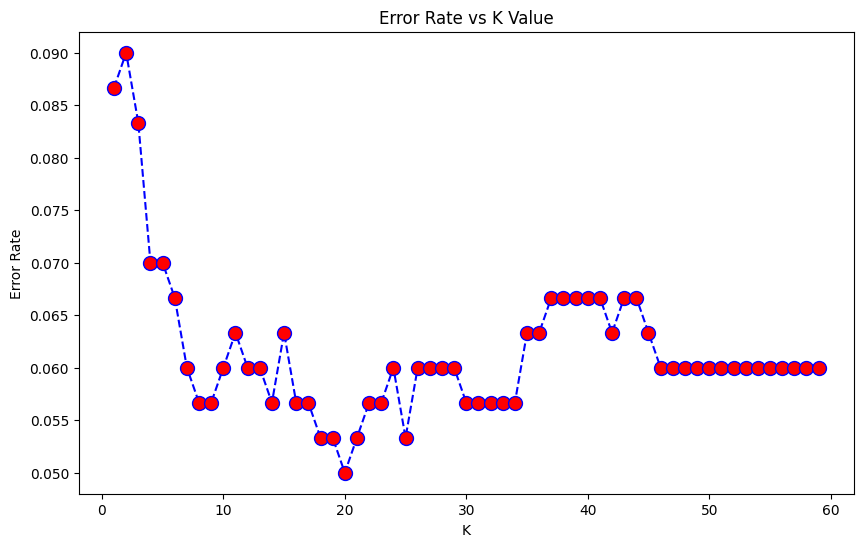

In [56]:
plt.figure(figsize=(10,6))
plt.plot(range(1,60),error_rate , color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [57]:
knn= KNeighborsClassifier(n_neighbors=40)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
print(accuracy_score(y_test, pred))

[[137  14]
 [  6 143]]
              precision    recall  f1-score   support

           0       0.96      0.91      0.93       151
           1       0.91      0.96      0.93       149

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300

0.9333333333333333
